# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('german_credit_data.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
#Количество пропусков
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [3]:
#процент пропусков
df.isna().sum() / df.shape[0] * 100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [4]:
df.Risk.value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [5]:
df.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

<Axes: >

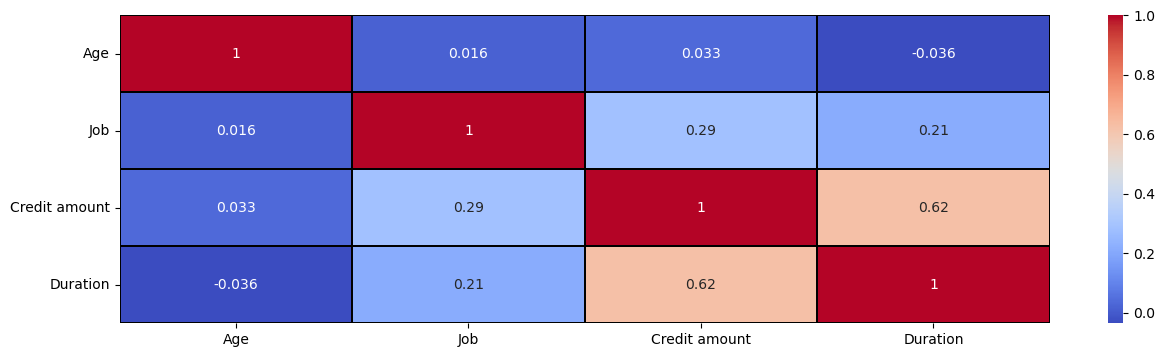

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['Age','Job',  'Credit amount', 'Duration']
plt.figure(figsize=(15, 4))

sns.heatmap(df[cols].corr(), annot = True,cmap= 'coolwarm', linewidths=0.1, linecolor='black')

Histogram for Age


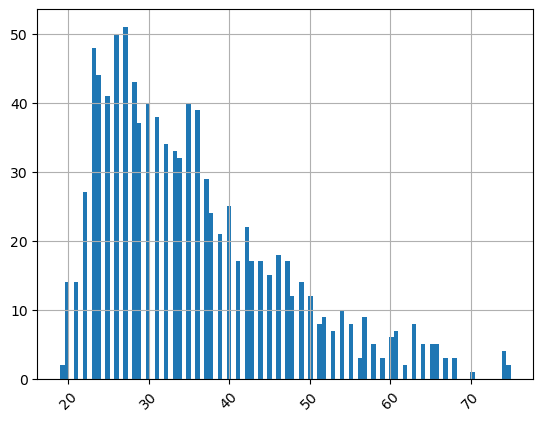

Histogram for Sex


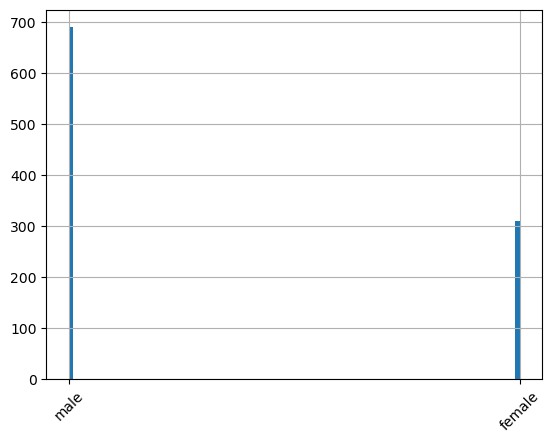

Histogram for Job


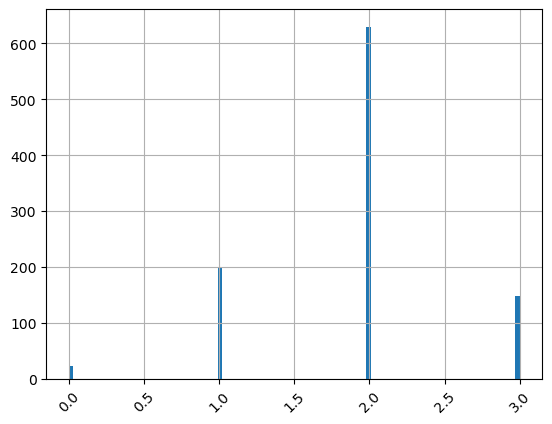

Histogram for Housing


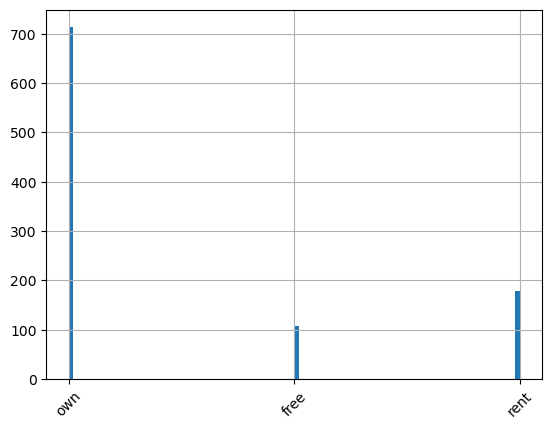

Histogram for Saving accounts


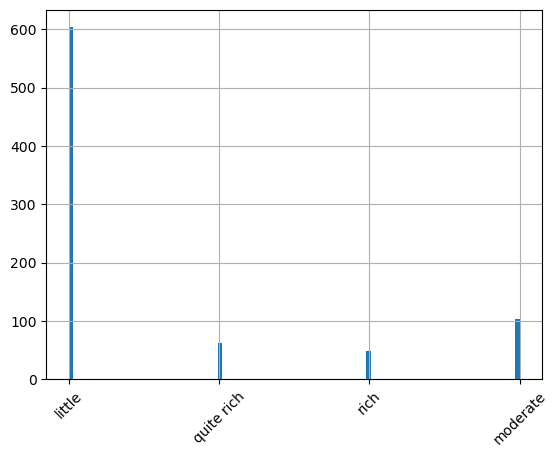

Histogram for Checking account


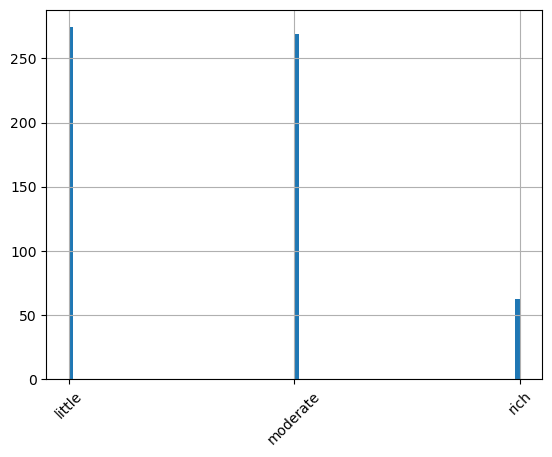

Histogram for Credit amount


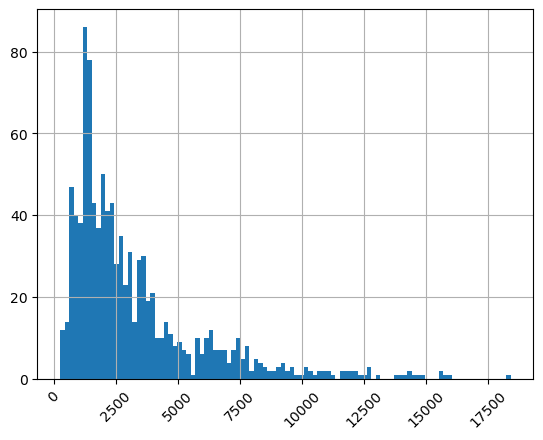

Histogram for Duration


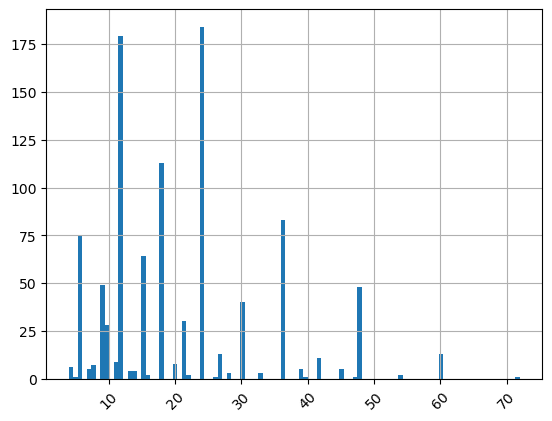

Histogram for Purpose


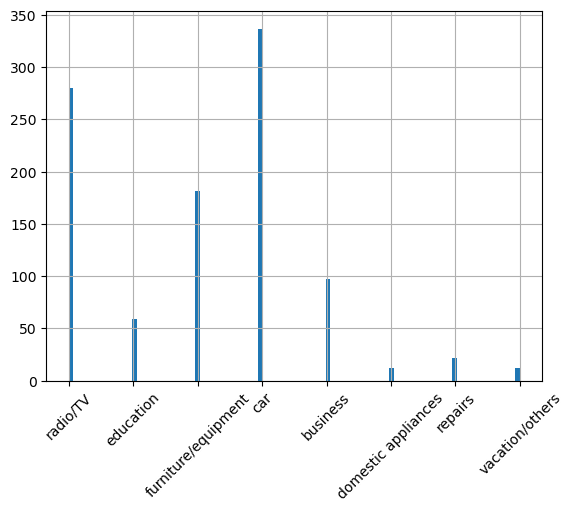

Histogram for Risk


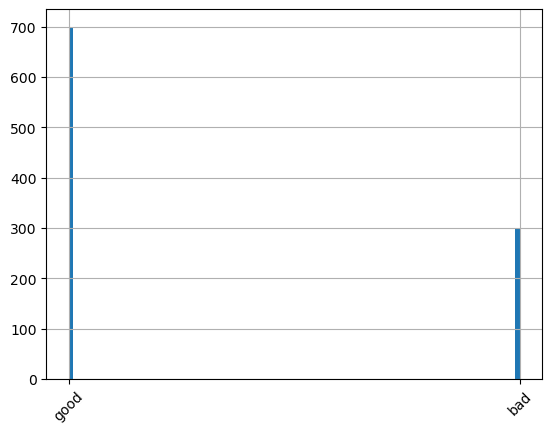

In [7]:

cols = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']

for col in cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.xticks(rotation = 45)
  plt.show()

(0.0, 80.0)

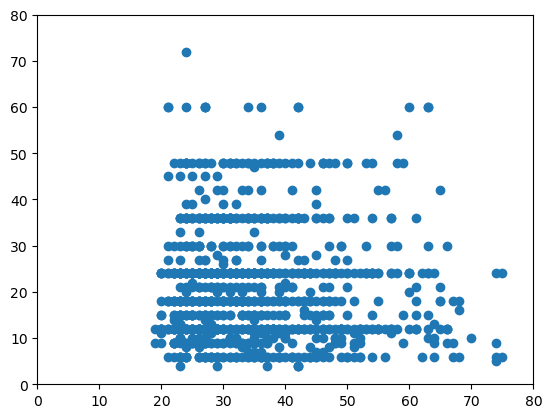

In [8]:
plt.scatter(df.Age, df.Duration)
plt.xlim(0, 80)
plt.ylim(0, 80)

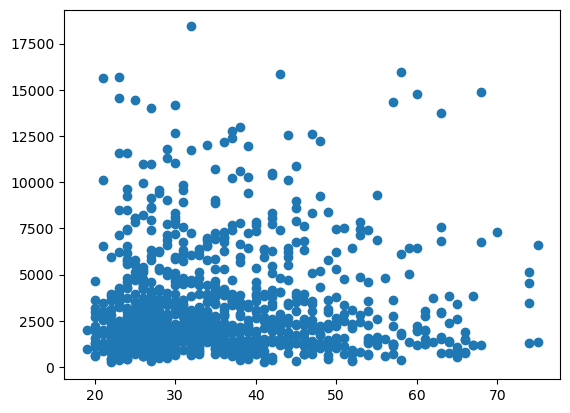

In [9]:
plt.scatter(df.Age, df['Credit amount'])


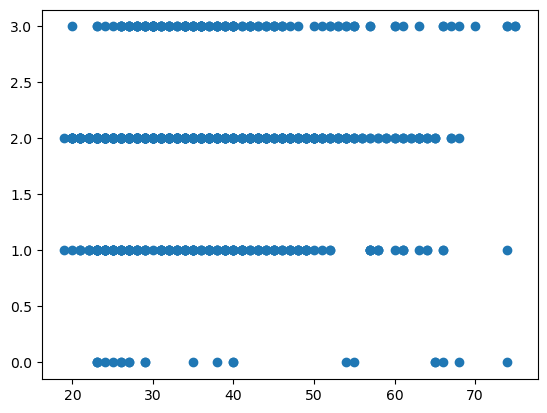

In [10]:
plt.scatter(df.Age, df.Job)

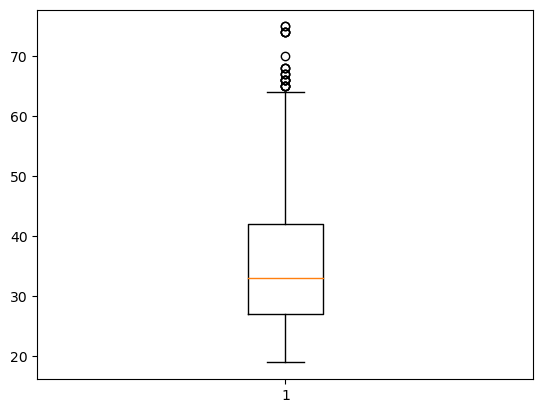

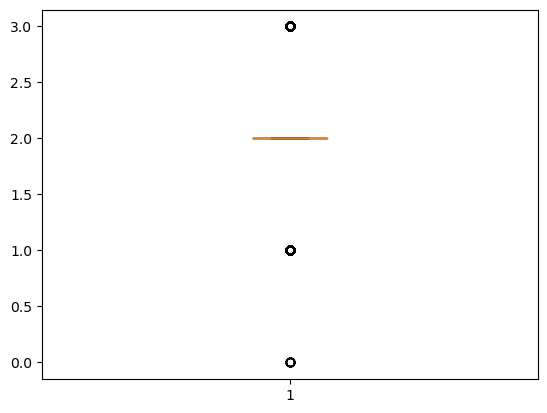

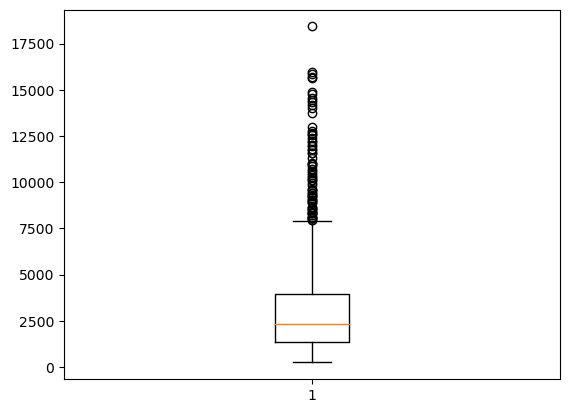

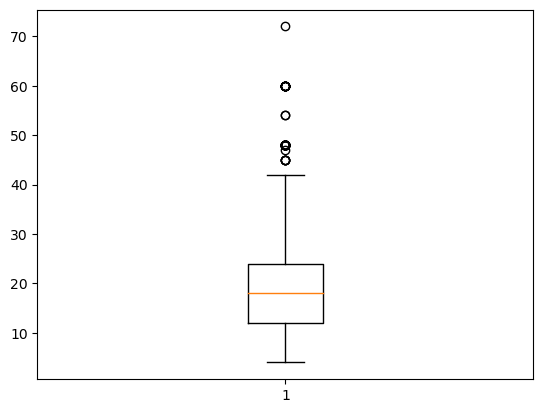

In [11]:
cols = ['Age','Job', 'Credit amount', 'Duration']
for col in cols:
    plt.boxplot(df[col])
    plt.show()

In [12]:
def calculate_outliers(data): #функция для нахождения границ
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

for col in cols:
    boundaries = calculate_outliers(df[col])
    #Cчитаем и выводим количество выбросов в доходе.
    is_outlier = (df[col] < boundaries[0]) | (df[col] > boundaries[1])
    print('Kоличество выбросов в', col, ' = ', is_outlier.sum(), 
        'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])

Kоличество выбросов в Age  =  23 граница нижняя - 4.5 граница верхняя - 64.5
Kоличество выбросов в Job  =  370 граница нижняя - 2.0 граница верхняя - 2.0
Kоличество выбросов в Credit amount  =  72 граница нижняя - -2544.625 граница верхняя - 7882.375
Kоличество выбросов в Duration  =  70 граница нижняя - -6.0 граница верхняя - 42.0


In [13]:
boundaries = calculate_outliers(df['Age'])
#Cчитаем и выводим количество выбросов в Age.
is_outlier = (df['Age'] < boundaries[0]) | (df['Age'] > boundaries[1])
print('Kоличество выбросов в Age   = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Age')
df_cp
#Это аномалии, так как возраст вполне реален, а в Германии есть банки, которые выдают кредит и в возрасте 76-79 лет

Kоличество выбросов в Age   =  23 граница нижняя - 4.5 граница верхняя - 64.5


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
179,65,male,2,own,little,little,571,21,car,good
807,65,male,2,own,NaN,NaN,930,12,radio/TV,good
438,65,male,0,own,little,little,3394,42,repairs,good
883,65,female,0,own,little,NaN,1098,18,radio/TV,good
624,65,male,2,free,little,little,2600,18,radio/TV,bad
75,66,male,3,free,little,little,1526,12,car,good
137,66,male,1,own,quite rich,moderate,766,12,radio/TV,bad
213,66,male,3,own,little,rich,1908,30,business,bad
774,66,male,0,free,quite rich,rich,1480,12,car,good
723,66,female,1,own,quite rich,moderate,790,9,radio/TV,good


In [14]:
boundaries = calculate_outliers(df['Credit amount'])
#Cчитаем и выводим количество выбросов в Credit amount'.
is_outlier = (df['Credit amount'] < boundaries[0]) | (df['Credit amount'] > boundaries[1])
print('Kоличество выбросов в Credit amount   = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Credit amount')
df_cp
# 18424 вполне реальная сумма кредита

Kоличество выбросов в Credit amount   =  72 граница нижняя - -2544.625 граница верхняя - 7882.375


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
525,30,male,2,own,little,moderate,7966,26,car,good
645,27,male,2,rent,NaN,NaN,7980,36,business,bad
771,25,female,3,own,little,little,8065,36,education,bad
17,25,male,2,own,NaN,little,8072,30,business,good
653,42,male,3,own,moderate,moderate,8086,36,car,bad
...,...,...,...,...,...,...,...,...,...,...
637,21,male,2,own,little,NaN,15653,60,radio/TV,good
887,23,male,2,own,little,moderate,15672,48,business,bad
818,43,male,3,own,little,little,15857,36,vacation/others,good
95,58,male,2,rent,little,moderate,15945,54,business,bad


In [15]:
boundaries = calculate_outliers(df['Duration'])
#Cчитаем и выводим количество выбросов в Duration.
is_outlier = (df['Duration'] < boundaries[0]) | (df['Duration'] > boundaries[1])
print('Kоличество выбросов в Duration  = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])
df_cp = df[is_outlier].sort_values(by='Duration')
df_cp
#Сроки 45-72 мес так же реальны

Kоличество выбросов в Duration  =  70 граница нижняя - -6.0 граница верхняя - 42.0


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
999,27,male,2,own,moderate,moderate,4576,45,car,good
194,21,male,2,rent,moderate,moderate,3031,45,radio/TV,bad
35,25,male,1,own,little,moderate,4746,45,radio/TV,bad
832,29,male,2,rent,little,little,11816,45,business,bad
998,23,male,2,free,little,little,1845,45,radio/TV,bad
...,...,...,...,...,...,...,...,...,...,...
973,36,male,2,rent,little,little,7297,60,business,bad
373,63,male,3,free,NaN,NaN,13756,60,car,good
714,27,male,3,own,little,moderate,14027,60,car,bad
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad


### В данных есть пропуски Saving accounts - 18.3% и Checking account - 39.4%.
### Слабая линейная зависимоть, кроме суммы и срока кредита, там коэф. корреляции = 0.62, что логично, чем больше кредит, тем дольше срок
### Данные которые определяются каквыбросы вполне реальны.
### Забегая вперед, выборка несбалансированная.



# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [16]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1

df_train, df_test = train_test_split(df, stratify=df['Risk'], test_size=0.2, random_state=RANDOM_SEED)

# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [17]:
df_train.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     143
Checking account    307
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [18]:
# Рассмотрим структуру признака Checking account
df_train['Checking account'].value_counts()

Checking account
little      222
moderate    217
rich         54
Name: count, dtype: int64

### пропуски в данном случае заполняю значением other, так как всего 3 значения, 2 из которых практически равны по количеству и заполнение самым частым значением приведет к искажению данных.

In [19]:
# Рассмотрим структуру признака Saving accounts
df_train['Saving accounts'].value_counts()

Saving accounts
little        485
moderate       90
quite rich     46
rich           36
Name: count, dtype: int64

### здесь пропуски уже можно заполнить наиболее часто встречающимся значением, так как здесь есть сильный перевес одного из значений признака.

In [20]:
#Заменим пропуски 'Saving accounts' наиболее популярным значением, так как это категориальный признак
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(strategy='most_frequent')

mode_cols = ['Saving accounts']

df_train[mode_cols] = imp_mode.fit_transform(df_train[mode_cols])
df_train[mode_cols].isna().sum()

Saving accounts    0
dtype: int64

In [21]:
# Заполним пропуски 'Checking account'  значением "Other"
cols_fill_other = ['Checking account']
imp_const = SimpleImputer(strategy='constant', fill_value='other')

df_train[cols_fill_other] = imp_const.fit_transform(df_train[cols_fill_other])

# Проверяем, что всем пропуски заполнены
df_train[cols_fill_other].isna().sum()

Checking account    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cols_to_le = 'Risk' 
df_train[cols_to_le] = encoder.fit_transform(df_train[cols_to_le]).astype(int)
df_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
561,24,male,1,rent,little,little,1546,24,radio/TV,0
613,22,female,2,rent,little,little,3632,24,car,1
352,38,male,3,own,little,other,3229,18,car,1
568,41,male,2,own,little,moderate,3979,48,radio/TV,1
295,26,female,2,own,little,moderate,9960,48,furniture/equipment,0


In [24]:
# категориальные признаки кодируем с помощью ohe, 
# и удаляем первый столбец, чтобы избавиться от линейной зависимости
from sklearn.preprocessing import OneHotEncoder
quant_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose' ]

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
ohe.fit(df_train[quant_cols])
ohe_transform = ohe.transform(df_train[quant_cols]) 
ohe.get_feature_names_out()
df_train[ohe.get_feature_names_out()] = ohe_transform 
df_train.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_moderate,Checking account_other,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,male,1,rent,little,little,1546,24,radio/TV,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,22,female,2,rent,little,little,3632,24,car,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
352,38,male,3,own,little,other,3229,18,car,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,41,male,2,own,little,moderate,3979,48,radio/TV,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,26,female,2,own,little,moderate,9960,48,furniture/equipment,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_train = df_train.drop(columns=quant_cols)
df_train.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_other,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
561,24,1,1546,24,0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
613,22,2,3632,24,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
352,38,3,3229,18,1,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,41,2,3979,48,1,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
295,26,2,9960,48,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

col_num_list = ['Age', 'Job', 'Credit amount', 'Duration']

col_std_list_train = std_scaler.fit_transform(df_train[col_num_list])
df_train[col_num_list] = col_std_list_train

In [27]:
df_test[mode_cols] = imp_mode.transform(df_test[mode_cols])
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
586,36,male,2,rent,little,little,2799,9,car,good
803,35,male,2,own,little,NaN,976,12,radio/TV,good
846,68,male,2,rent,little,NaN,6761,18,car,bad
932,30,male,2,own,little,NaN,1224,9,car,good
788,50,male,2,free,little,moderate,6224,48,education,bad


In [28]:
df_test[cols_fill_other] = imp_const.transform(df_test[cols_fill_other])
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
586,36,male,2,rent,little,little,2799,9,car,good
803,35,male,2,own,little,other,976,12,radio/TV,good
846,68,male,2,rent,little,other,6761,18,car,bad
932,30,male,2,own,little,other,1224,9,car,good
788,50,male,2,free,little,moderate,6224,48,education,bad


In [29]:
ohe.fit(df_test[quant_cols])
ohe_transform = ohe.transform(df_test[quant_cols]) 
df_test[ohe.get_feature_names_out()] = ohe_transform 
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Checking account_moderate,Checking account_other,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
586,36,male,2,rent,little,little,2799,9,car,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
803,35,male,2,own,little,other,976,12,radio/TV,good,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
846,68,male,2,rent,little,other,6761,18,car,bad,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
932,30,male,2,own,little,other,1224,9,car,good,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
788,50,male,2,free,little,moderate,6224,48,education,bad,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
df_test = df_test.drop(columns=quant_cols)
df_test.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_other,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
586,36,2,2799,9,good,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
803,35,2,976,12,good,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
846,68,2,6761,18,bad,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
932,30,2,1224,9,good,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
788,50,2,6224,48,bad,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
col_num_list = ['Age', 'Job', 'Credit amount', 'Duration']

col_std_list_train = std_scaler.fit_transform(df_test[col_num_list])
df_test[col_num_list] = col_std_list_train

In [32]:
cols_to_le = 'Risk'
df_test[cols_to_le] = encoder.transform(df_test[cols_to_le]).astype(int)
df_test.head()

,Age,Job,Credit amount,Duration,Risk,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_other,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
586,0.188687,0.177783,-0.175424,-0.973353,1,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
803,0.093869,0.177783,-0.834083,-0.708974,1,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
846,3.222852,0.177783,1.256065,-0.180218,0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
932,-0.380219,0.177783,-0.744479,-0.973353,1,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
788,1.516134,0.177783,1.062044,2.463565,0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [33]:
df_test.columns.tolist()

['Age',
 'Job',
 'Credit amount',
 'Duration',
 'Risk',
 'Sex_male',
 'Housing_own',
 'Housing_rent',
 'Saving accounts_moderate',
 'Saving accounts_quite rich',
 'Saving accounts_rich',
 'Checking account_moderate',
 'Checking account_other',
 'Checking account_rich',
 'Purpose_car',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_furniture/equipment',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_vacation/others']

In [34]:
from imblearn.over_sampling import SMOTE

RANDOM_SEED = 1

os = SMOTE(random_state=RANDOM_SEED, k_neighbors=2)

features = df_train.drop('Risk', axis=1).columns.tolist()
target = 'Risk'

X_train, y_train = os.fit_resample(df_train[features], df_train[target])

In [35]:
y_train.value_counts()

Risk
0    560
1    560
Name: count, dtype: int64

In [36]:
X_test = df_test.drop(columns='Risk')
y_test = df_test.Risk

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

TreeCl = RandomForestClassifier()
TreeCl.fit(X_train, y_train)

pred_TreeCl = TreeCl.predict_proba(X_test)[:,1]

print('roc_auc RandomForestClassifier', roc_auc_score(y_test, pred_TreeCl))

roc_auc Решающее дерево 0.7285714285714285


In [48]:
#Подбор параметров 
import numpy as np
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': np.arange(1, 10, 2),
          'max_features': np.arange(1, 4, 1),
          'min_samples_leaf': np.arange(1, 10, 2),
          'min_samples_split': np.arange(1, 10, 2)}

gs = GridSearchCV(TreeCl, params, cv=3, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_estimator_)

best score: 0.8694697433497421
best params: RandomForestClassifier(max_depth=9, max_features=3, min_samples_split=5,
                       n_estimators=40)


In [61]:
#проверка подбранных параметров на стандартизированной выборке
TreeCl_tuned = gs.best_estimator_
TreeCl_tuned.fit(X_train, y_train)

pred_TreeCl_tuned = TreeCl_tuned.predict_proba(X_test)[:,1]

print('roc_auc RandomForestClassifier', roc_auc_score(y_test, pred_TreeCl_tuned))

roc_auc RandomForestClassifier 0.7570238095238095


## Вывод
### Подбор гиперпараметров, после балансировки методом SMOTE улучшил метрику с 0.72857 до 0.75702


# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [62]:
X_train, y_train = df_train[features], df_train[target]
(df_train[df_train['Risk'] == 1].shape[0] / df_train[df_train['Risk'] == 0].shape[0])

2.3333333333333335

In [63]:
# Подбираем гиперпараметры, включая веса классов
params = {'n_estimators': np.arange(10, 100, 10),
          'max_depth': np.arange(1, 10, 2),
          'max_features': np.arange(1, 4, 1),
          'min_samples_leaf': np.arange(1, 10, 2),
          'min_samples_split': np.arange(1, 10, 2),
          'class_weight' : [ {0:1, 1:2.33}, {0:1, 1:3.0}, {0:1, 1:3.5}, {0:1, 1:4}, {0:1, 1:5}]
          }

gs = GridSearchCV(TreeCl, params, cv=3, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_estimator_)


best score: 0.7536586812144214
best params: RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=9, max_features=3,
                       min_samples_leaf=7, min_samples_split=5,
                       n_estimators=20)


In [73]:
# Проверяем подобранные
model = gs.best_estimator_

model.fit(X_train, y_train)

print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.7644047619047619


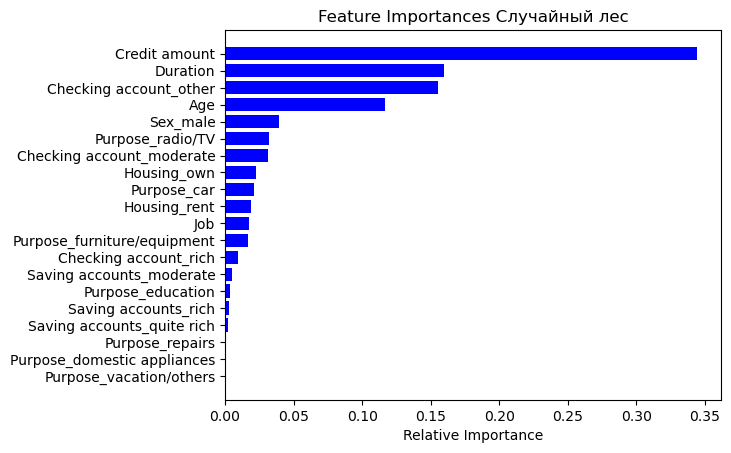

In [74]:
import matplotlib.pyplot as plt
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances Случайный лес')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Вывод
### Подбор гиперпараметров с параметром class_weight дал результат метрики roc_auc 0.76440, это лучше чем 0.75702, которые мы получили при подборе гиперпараметров на выборке, которую сбалансировали методом SMOTE. Так же стоит отметить, что был использован баланс классов 1:5.

